In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from launcher import launch_grid
from exps import *
from utils import get_opts
from plot_utils import *

# create the 6 setups
setups = ['CC_wrn', 'CC_ResNet18', 'CC_ResNet10', 'CC_conv4', 'protonet_wrn', 'matchingnet_wrn']
setup_to_name = {
    'CC_wrn':'CC WRN',
    'CC_conv4':'CC Conv4',
    'CC_ResNet10':'CC ResNet10',
    'CC_ResNet18':'CC ResNet18',
    'protonet_wrn':'ProtoNet WRN',
    'matchingnet_wrn':'MatchingNet WRN',
}

In [ ]:
# repeat all CL exps with 100 epochs of 1000 iterations ?

# Table 1 experiments

In [ ]:
opt = get_opts()

# # miniIN and CUB - 12 exps * 3 seeds
# grid = {
#     'setup':setups,
#     'dataset':['miniIN', 'cub'],
#     'seed':range(3),
#     'steps':[[30000, 31000, 35000]],
# }
# jobs = launch_grid(exp_miniIN_cub, opt, grid, 
#                    folder='submitit_runs2/table1/miniIN_cub/', partition='priority')

# # Random same as miniIN - 6exps * 3 seeds
# grid = {
#     'setup':setups,
#     'benchmark':['miniIN'],
#     # dataset sampled 38400 64x600 
#     'N':[38400],
#     'nc':[64],
#     'seed':range(3),
#     'steps':[[30000, 31000, 35000]],
# }
# jobs = launch_grid(exp_tradeoff, opt, grid, 
#                    folder='submitit_runs2/table1/same_as_miniIN/', partition='uninterrupted')

# # Random same as CUB - 6exps * 3 seeds
# grid = {
#     'setup':setups,
#     'benchmark':['cub'],
#     # dataset sampled 38400 64x600 
#     'N':[5885],
#     'nc':[100],
#     'seed':range(3),
#     'steps':[[30000, 31000, 35000]],
# }
# jobs = launch_grid(exp_tradeoff, opt, grid, 
#                    folder='submitit_runs2/table1/same_as_CUB/', partition='uninterrupted')

# # CC methods use 8 gpus on miniIN6k - 8 exps * 3 seeds
# opt = get_opts()
# opt.ngpus = 8
# opt.delete_ckpt = True
# opt.steps = None
# grid = {
#     'seed':range(3),
#     'setup':setups[:4],
#     'benchmark':['miniIN', 'cub'],
# }

# jobs = launch_grid(exp_train_miniIN6k, opt, grid, 
#                    folder='submitit_runs2/table1/miniIN6k_CC/', partition='priority')

# # Protonet and matchingNet on MiniIN6k use only 1 GPU - 4 exps * 3 seeds
# opt = get_opts()
# opt.ngpus = 1
# opt.stop_epoch = 3500

# grid = {
#     'seed':range(3),
#     'setup':setups[4:],
#     'benchmark':['miniIN', 'cub'],
# }

# jobs = launch_grid(exp_train_miniIN6k, opt, grid, 
#                    folder='submitit_runs2/table1/miniIN6k_meta/', partition='uninterrupted')


## Table 1 latex

In [6]:
dirs = [
#     'submitit_runs2/table1/miniIN_cub/', # miniIN and CUB - 12 exps * 3 seeds
#     'submitit_runs2/table1/same_as_miniIN/', # Random same as miniIN - 6exps * 3 seeds
#     'submitit_runs2/table1/same_as_CUB/', # Random same as CUB - 6exps * 3 seeds
#     'submitit_runs2/table1/miniIN6k_CC/',
#     'submitit_runs2/table1/miniIN6k_meta/'
]

for result_dir in dirs:
    print('-----------')
    print(result_dir)
    show_grid_and_results(result_dir)

#              miniIN                Same as minIN        miniIN6k                CUB                 same as CUB         miniIN6k*
# -------------------------------------------------------------------------------------------------------------------------
# Conv4    \mvar{64.27}{0.02}  & \mvar{62.37}{0.24}  & \mvar{73.56}{0.07}  & \mvar{79.38}{0.26}  & \mvar{56.06}{0.49}  & \mvar{64.67}{0.41} \\
# Resnet10 \mvar{76.50}{0.27}  & \mvar{73.63}{1.21}  & \mvar{91.65}{0.07}  & \mvar{90.43}{0.08}  & \mvar{54.59}{0.40}  & \mvar{81.46}{0.46} \\
# Resnet18 \mvar{78.39}{0.17}  & \mvar{74.74}{1.58}  & \mvar{95.14}{0.04}  & \mvar{90.92}{0.19}  & \mvar{55.10}{1.20}  & \mvar{88.28}{0.13} \\
# WRN      \mvar{78.76}{0.08}  & \mvar{75.07}{1.36}  & \mvar{96.87}{0.03}  & \mvar{90.87}{0.11}  & \mvar{56.24}{0.34}  & \mvar{90.28}{0.19} \\
# -------------------------------------------------------------------------------------------------------------------------
# ProtoNet \mvar{73.37}{0.20}  & \mvar{70.47}{0.52}  & \mvar{88.31}{0.14}  & \mvar{88.33}{0.19}  & \mvar{50.64}{0.23}  & \mvar{73.20}{0.72} \\
# MatchNet \mvar{67.86}{0.27}  & \mvar{65.73}{0.97}  & \mvar{86.31}{0.72}  & \mvar{85.13}{0.37}  & \mvar{46.11}{0.19}  & \mvar{64.16}{1.24} \\

# Fig 4 experiments

## Figure 4 a

In [ ]:
# on miniIN using different features
# moco , oracle, wordnet
# miniIN
# random, closest, farthest
# 6000, 2500, ...

# launch on 2500 classes
rankmodes = ['closest']
feats     = ['oracle'] # ['oracle','moco','wordnet']
if rankmodes == ['random']:
    feats = ['oracle']

# AVOID launching random experiments many times
for nc in [2500, 1000, 500, 100, 50, 10]:#[6000]:#, 100, 50, 10 [2500, 1000, 500, 100, 50, 10]:#[10, 50, 100, 500, 1000, 2500, 6000]:#
    print(f'nc : {nc}')
    base_opt = get_opts()
    base_opt.lr = 0.1
    N = nc*900
    if N > 1e6:
        bSz = 256; ngpus = 8
        base_opt.n_workers = 20
        base_opt.steps = None
    elif N > 1e5:
        bSz = 256; ngpus = 2
        base_opt.n_workers = 16
        base_opt.steps = None
    elif N > 1e4:
        bSz = 64; ngpus = 1
        base_opt.steps = None
    else:
        bSz = 64; ngpus = 1
        base_opt.steps = [15000, 17500, 20000]
    base_opt.bSz = bSz; base_opt.ngpus = ngpus
    
    print(N, bSz, ngpus, base_opt.steps)

    print('closest, farthest')
    grid = {
        'setup':['CC_wrn'],
        'benchmark':['miniIN'],
        'rankmode':['closest','farthest'],# Do random separately without features
        'nc':[nc],
        'nim':[900],
        'seed':range(3),
        'feat':['oracle', 'moco', 'wordnet'],
    }
    jobs = launch_grid(exp_closest_farthest_test, base_opt, grid, 
                   folder='submitit_runs2/fig4_a_features_miniIN/all_nc/', partition='priority')
    
    print('random')
    grid = {
        'setup':['CC_wrn'],
        'benchmark':['miniIN'],
        'rankmode':['random'],# Do random separately without features
        'nc':[nc],
        'nim':[900],
        'seed':range(3),
#         'feat':['oracle', 'moco', 'wordnet'],
    }
    jobs = launch_grid(exp_closest_farthest_test, base_opt, grid, 
                   folder='submitit_runs2/fig4_a_features_miniIN/all_nc/', partition='priority')

# 27 exps (2500)

In [ ]:
dirs = [
    'submitit_runs2/fig4_a_features_miniIN/all_nc/', # 27 * 6 (2500, 1000, 500, 100, 50, 10)
]
for result_dir in dirs:
    print('-----------')
    print(result_dir)
    show_grid_and_results(result_dir)

In [5]:
# results of fig 4a on miniIN with different features

# Random
# 2500, random 94.66±0.17
# 1000, random 91.31±0.35
# 500,  random 87.07±0.62
# 100,  random !!78??!!! 
# 50,   random 73.81±1.88
# 10,   random 55.56±1.76

# Oracle
# 2500, farthest: 83.36±0.04, closest: 96.68±0.06
# 1000, farthest: 76.14±0.20, closest: 96.36±0.03
# 500,  farthest: 72.09±0.20, closest: 95.53±0.08
# 100,  farthest: 64.20±0.22, closest: 92.09±0.05
# 50,   farthest: 61.53±0.43, closest: 90.16±0.11
# 10,   farthest: 50.05±0.39, closest: 75.78±0.26

# MOCO
# 2500, farthest: 86.92±0.16, closest: 96.73±0.04 # Farthest much much better than with oracle
# 1000, farthest: 79.91±0.17, closest: 96.02±0.06 # Again farthest better than with oracle, closest less good
# 500,  farthest: 74.40±0.21, closest: 94.80±0.27
# 100,  farthest: 65.92±0.40, closest: 91.24±0.14
# 50,   farthest: 60.52±0.24, closest: 89.23±0.18
# 10,   farthest: 48.41±0.61, closest: 74.54±0.27

# WORDNET
# 2500, farthest: 89.59±0.18, closest: 96.34±0.04
# 1000, farthest: 84.79±0.14, closest: 95.84±0.06
# 500,  farthest: 80.86±0.53, closest: 94.67±0.09
# 100,  farthest: 69.86±0.20, closest: 90.94±0.11
# 50,   farthest: 66.30±0.43, closest: 88.61±0.08
# 10,   farthest: 48.41±0.67, closest: 67.23±0.36


0

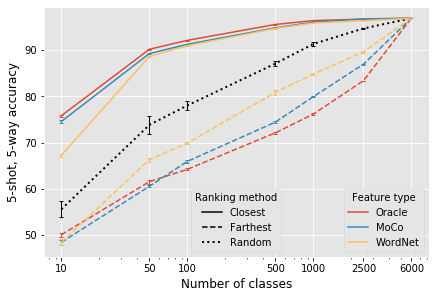

In [48]:
# Figure 4a miniIN
fig, ax = plt.subplots(figsize=(6.9, 4.6))

## plot random class selection black line
xaxis = [10, 50, 100, 500, 1000, 2500, 6000]
top5ms = [55.56, 73.81, 78, 87.07, 91.31, 94.66, 96.87]
top5stds = [1.76, 1.88, 1, 0.62, 0.35, 0.17, 0.03]

(randline, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='dotted', marker='', markersize=6, capsize=2, 
                            elinewidth=1, color='black', linewidth=2)

## plot closest
# oracle
top5ms = [75.78, 90.16, 92.09, 95.53, 96.36, 96.68]  + [96.87]
top5stds = [0.26, 0.11, 0.05, 0.08, 0.03, 0.06]  + [0.03]
(oracle_closest, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='solid', marker='', markersize=6, capsize=2, 
                            elinewidth=1, color=colors[0], linewidth=1.5)

# moco
top5ms = [74.54, 89.23, 91.24, 94.8, 96.02, 96.73]  + [96.87]
top5stds = [0.27, 0.18, 0.14, 0.27, 0.06, 0.04]  + [0.03]

(moco_closest, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='solid', marker='', markersize=6, capsize=2, 
                            elinewidth=1, color=colors[1], linewidth=1.5)

# wordnet
top5ms = [67.23, 88.61, 90.94, 94.67, 95.84, 96.34]  + [96.87]
top5stds = [0.36, 0.08, 0.11, 0.09, 0.06, 0.04]  + [0.03]
(wordnet_closest, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='solid', marker='', markersize=6, capsize=2, 
                            elinewidth=1, color=colors[2], linewidth=1.5)

## plot farthest
# oracle
top5ms = [50.05, 61.53, 64.2, 72.09, 76.14, 83.36] + [96.87]
top5stds = [0.39, 0.43, 0.22, 0.2, 0.2, 0.04] + [0.03]
(oracle_farthest, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='dashed', marker='', markersize=6, capsize=2, 
                            elinewidth=1, color=colors[0], linewidth=1.5)

# moco
top5ms = [48.41, 60.52, 65.92, 74.4, 79.91, 86.92] + [96.87]
top5stds = [0.61, 0.24, 0.4, 0.21, 0.17, 0.16] + [0.03]
(moco_farthest, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='dashed', marker='', markersize=6, capsize=2, 
                            elinewidth=1, color=colors[1], linewidth=1.5)

# wordnet
top5ms = [48.41, 66.3, 69.86, 80.86, 84.79, 89.59] + [96.87]
top5stds = [0.67, 0.43, 0.2, 0.53, 0.14, 0.18] + [0.03]
(wordnet_farthest, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='dashed', marker='', markersize=6, capsize=2, 
                            elinewidth=1, color=colors[2], linewidth=1.5)

ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks(xaxis)
ax.set_xticklabels(xaxis)
ax.set_xlabel(f'Number of classes')
ax.set_ylabel(f'5-shot, 5-way accuracy')

legend1 = Legend(ax, [oracle_closest, moco_closest, wordnet_closest], ['Oracle', 'MoCo', 'WordNet'], loc=4, title='Feature type')
ax.add_artist(legend1)

legend2 = Legend(ax, [oracle_closest, oracle_farthest, randline], ['Closest', 'Farthest', 'Random'], loc=8, title='Ranking method')
ax.add_artist(legend2)
for h in legend2.legendHandles:
    h.set_color('black')

In [49]:
fig.savefig(f'submitit_runs2/fig4_a_features_miniIN/figure4a_miniIN.pdf', format='pdf', bbox_inches="tight")

In [ ]:
# Figure 4 b - sifferent setups

In [ ]:
# launch on 2500 classes
rankmodes = ['closest']
feats     = ['oracle'] # ['oracle','moco','wordnet']
if rankmodes == ['random']:
    feats = ['oracle']

for nc in [2500]:#, 1000, 500, 100, 50, 10[6000]:#, 100, 50, 10 [2500, 1000, 500, 100, 50, 10]:#[10, 50, 100, 500, 1000, 2500, 6000]:#
    base_opt = get_opts()
    base_opt.lr = 0.1
    N = nc*900
    if N > 1e6:
        bSz = 256; ngpus = 8
        base_opt.n_workers = 20
        base_opt.steps = None
    elif N > 1e5:
        bSz = 256; ngpus = 2
        base_opt.n_workers = 16
        base_opt.steps = None
    elif N > 1e4:
        bSz = 64; ngpus = 1
        base_opt.steps = None
    else:
        bSz = 64; ngpus = 1
        base_opt.steps = [15000, 17500, 20000]
    base_opt.bSz = bSz; base_opt.ngpus = ngpus
    
    print(N, bSz, ngpus, base_opt.steps)

    grid = {
        'setup':['CC_wrn','CC_ResNet10', 'CC_ResNet18', 'CC_conv4'],
        'benchmark':['miniIN', 'cub'],
        'rankmode':['farthest'],#'random','closest'
        'nc':[nc],
        'nim':[900],
        'seed':range(3),
        'feat':['oracle'],
    }
    jobs = launch_grid(exp_closest_farthest_test, base_opt, grid, 
                   folder='submitit_runs2/fig4/different_setups_2500/', partition='priority')


In [7]:
dirs = [
    'submitit_runs2/fig4/different_setups_2500/', # 48 exps = 16exps * 3seeds
]
for result_dir in dirs:
    print('-----------')
    print(result_dir)
    show_grid_and_results(result_dir)
    
# WRN - miniIN: 6000: 96.87 - 2500 random - 94.58 - closest - 96.73
# RN18- miniIN: 6000: 95.14 - 2500 random - 93.52 - closest - 95.49
# RN10- miniIN: 6000: 91.65 - 2500 random - 90.26 - closest - 92.72 # It's easier for smaller architectures to learn on closest classes than on many ones
# Conv4 miniIN: 6000: 73.56 - 2500 random - 72.58 - closest - 75.32 
# + farthest ?


# WRN - CUB: 6000: 90.28 - 2500 random - 82.52 - closest - 87.74
# RN18- CUB: 6000: 88.28 - 2500 random -  - closest - 
# RN10- CUB: 6000: 81.46 - 2500 random - 78.46 - closest - 84.54
# Conv4 CUB: 6000: 64.67 - 2500 random - 63.71 - closest -  67.54


-----------
submitit_runs2/fig4/different_setups_2500/
{'setup': ['CC_wrn', 'CC_ResNet10', 'CC_ResNet18', 'CC_conv4'], 'seed': [1, 0, 2], 'benchmark': ['miniIN', 'cub'], 'rankmode': ['closest', 'random']}
03  -  {'setup': 'CC_wrn', 'benchmark': 'miniIN', 'rankmode': 'closest'} : 5-shot:96.73±0.08
02  -  {'setup': 'CC_wrn', 'benchmark': 'miniIN', 'rankmode': 'random'} : 5-shot:94.58±0.11
03  -  {'setup': 'CC_wrn', 'benchmark': 'cub', 'rankmode': 'closest'} : 5-shot:87.74±0.18
03  -  {'setup': 'CC_wrn', 'benchmark': 'cub', 'rankmode': 'random'} : 5-shot:82.52±0.88
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'miniIN', 'rankmode': 'closest'} : 5-shot:92.72±0.14
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'miniIN', 'rankmode': 'random'} : 5-shot:90.26±0.18
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'cub', 'rankmode': 'closest'} : 5-shot:84.54±0.39
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'cub', 'rankmode': 'random'} : 5-shot:78.46±0.33
01  -  {'setup': 'CC_ResNet18', 'benchmark': 'm

In [ ]:
# figure 4b miniIN
fig, ax = plt.subplots(figsize=(6.9, 4.6))

cc_wrn_cl_6k = 96.87, 0.03
cc_rn18_cl_6k = 95.14, 0.04
cc_rn10_cl_6k = 91.65, 0.07
cc_cv4_cl_6k = 73.56, 0.07
pn_cl_6k = 88.31, 0.14
mn_cl_6k = 86.31, 0.72

xaxis = [6000, 2500]
# 2500
cc_wrn_cl = [94.58, 96.73, ]# random, closest, farthest
cc_rn18_cl = [93.52, 95.49]
cc_rn10_cl = [90.26, 92.72]
cc_cv4_cl = [72.58, 75.32]
pn_cl = [,]
mn_cl = [,]



# Fig 5 experiments

In [ ]:
# trade off on miniIN, CUB and IN

grid38400 = {
    'N':[38400],
    'nc':[48, 64, 128, 256, 384, 512, 640, 1280, 3840],
    'seed':range(3),
    'benchmark':['miniIN', 'cub'],
}

base_opt = get_opts()
base_opt.steps = [30000,31000,35000]
jobs = launch_grid(exp_tradeoff, base_opt, grid38400, folder=f'submitit_runs2/fig5/tradeoff_miniIN_cub/38400/',
                   partition='uninterrupted')

grid3840 = {
    'N':[3840],
    'seed':range(3),
    'nc':[8, 16, 32, 64, 128, 256, 320, 640],
    'benchmark':['miniIN', 'cub'],
}

base_opt = get_opts()
base_opt.steps = [15000, 17500, 20000]

jobs = launch_grid(exp_tradeoff, base_opt, grid3840, folder='submitit_runs2/fig5/tradeoff_miniIN_cub/3840/', 
                   partition='uninterrupted')

# 102 exp


In [46]:
# add 384000
grid384000 = {
    'N':[384000],
    'nc':[430, 512, 640, 1280, 3840, 5000, 6000],
    'seed':range(1),
    'benchmark':['miniIN', 'cub'],
}

base_opt = get_opts()
base_opt.steps = None
base_opt.bSz = 256
jobs = launch_grid(exp_tradeoff, base_opt, grid384000, folder=f'submitit_runs2/fig5/tradeoff_miniIN_cub/384000/',
                   partition='uninterrupted')

Launching 14 experiments
0 submitit_runs2/fig5/tradeoff_miniIN_cub/384000/27897724_nc_430_benchmark_miniIN 27897724
1 submitit_runs2/fig5/tradeoff_miniIN_cub/384000/27897725_nc_430_benchmark_cub 27897725
2 submitit_runs2/fig5/tradeoff_miniIN_cub/384000/27897726_nc_512_benchmark_miniIN 27897726
3 submitit_runs2/fig5/tradeoff_miniIN_cub/384000/27897727_nc_512_benchmark_cub 27897727
4 submitit_runs2/fig5/tradeoff_miniIN_cub/384000/27897728_nc_640_benchmark_miniIN 27897728
5 submitit_runs2/fig5/tradeoff_miniIN_cub/384000/27897729_nc_640_benchmark_cub 27897729
6 submitit_runs2/fig5/tradeoff_miniIN_cub/384000/27897730_nc_1280_benchmark_miniIN 27897730
7 submitit_runs2/fig5/tradeoff_miniIN_cub/384000/27897731_nc_1280_benchmark_cub 27897731
8 submitit_runs2/fig5/tradeoff_miniIN_cub/384000/27897732_nc_3840_benchmark_miniIN 27897732
9 submitit_runs2/fig5/tradeoff_miniIN_cub/384000/27897733_nc_3840_benchmark_cub 27897733
10 submitit_runs2/fig5/tradeoff_miniIN_cub/384000/27897734_nc_5000_benchmark

In [ ]:
# dirs = [
#     'submitit_runs2/fig5/tradeoff_miniIN_cub/38400/',
#     'submitit_runs2/fig5/tradeoff_miniIN_cub/3840/'
# ]
# for result_dir in dirs:
#     print('-----------')
#     print(result_dir)
#     show_grid_and_results(result_dir)

## Fig 5: a and b

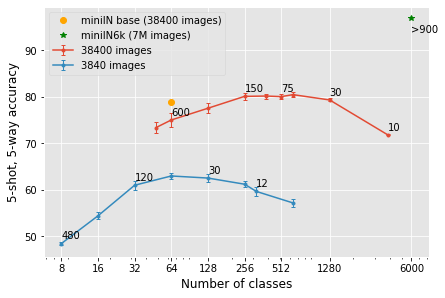

In [44]:
dset = 'miniIN'
dset_name = 'CUB' if dset == 'cub' else 'miniIN'
fig, ax = plt.subplots(figsize=(6.9, 4.6))

def fct(l,N):
    return [int(N//x) for x in l]

result_dir = 'submitit_runs2/fig5/tradeoff_miniIN_cub/38400/'

results, grid, args = get_result_dict(result_dir, take={'benchmark':dset})
xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('nc', grid, results)
(_, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='-', marker='.', label=f'38400 images', 
                            capsize=2, elinewidth=1, color=colors[0])
txts = fct(xaxis, 38400)
for i, x in enumerate(xaxis):
    if x not in [64, 256, 512, 1280, 3840]:
        continue
        
    ax.annotate(txts[i], (x, top5ms[i]+1))
ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())

result_dir = 'submitit_runs2/fig5/tradeoff_miniIN_cub/3840/'
results, grid, args = get_result_dict(result_dir, take={'benchmark':dset})
xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('nc', grid, results)
(_, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='-', marker='.', label=f'3840 images', 
                            capsize=2, elinewidth=1, color=colors[1])
txts = fct(xaxis, 3840)
for i, x in enumerate(xaxis):
    if i%2:
        continue
    ax.annotate(txts[i], (x, top5ms[i]+1))
xaxis_labels = [8, 16,32,64,128,256,512,1280]
if dset == 'cub':
    xaxis_labels.append(5704)
elif dset == 'miniIN':
    xaxis_labels.append(6000)

ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Number of classes')
ax.set_ylabel('5-shot, 5-way accuracy')

if dset == 'cub':
    ax.plot([100],   [90.32], marker='o', linestyle='None',  label='CUB base (5885 images)', color='orange')
    ax.annotate('~58', (100, 90.32-3))
    ax.plot([5704],   [90.89], marker='*', linestyle='None',  label='miniIN6k* (6.8M images)', color='green')
    ax.annotate('>900', (5000, 90.89-3))
    ax.legend(loc=6)
elif dset == 'miniIN':
    ax.plot([64],   [78.95], marker='o', linestyle='None',  label='miniIN base (38400 images)', color='orange')
#     ax.annotate('600', (64, 78.95+1))
    ax.plot([6000],   [96.91], marker='*', linestyle='None',  label='miniIN6k (7M images)', color='green')
    ax.annotate('>900', (6000, 96.91-3))
    ax.legend()

In [45]:
fig.savefig(f'submitit_runs2/fig5/fig_tradeoff_{dset}.pdf', format='pdf', bbox_inches="tight")

## Experiment Fig 5 c and d

In [ ]:
base_opt = get_opts()
base_opt.steps = [30000,31000,35000]

grid = {
    'N':[38400],
    'benchmark':['cub'],#['miniIN','cub'],
    'nc':[128, 512, 640, 1280, 3840],#[48, 64, 128, 256, 384, 512, 640, 1280, 3840],
    'setup':['protonet_wrn'],#['CC_ResNet18', 'CC_ResNet10', 'CC_conv4', 'protonet_wrn', 'matchingnet_wrn'],# 'CC_wrn',  from previous tradeoff experiment
    'seed':range(3),
}

jobs = launch_grid(exp_tradeoff, base_opt, grid, folder=f'submitit_runs2/fig5/setups_c_d/',
                   partition='uninterrupted')
# 270 exps

In [29]:
# for job in jobs:
#     job['job'].cancel()

In [ ]:
show_grid_and_results('submitit_runs2/fig5/setups_c_d/')

In [27]:
# get_result_dict('submitit_runs2/fig5/setups_c_d/', take={'benchmark':'miniIN', 'nc':48, 'setup':'CC_ResNet10'})

# results
miniIN
wrn: 48:
resnet18
resnet10: 48: 71.96±1.52, 64: 71.96±0.07, 128: 75.73±1.23, 256: 76.45±1.19, 384: 75.99±0.60
conv4: 48: 62

# miniIN
Resnet18 miniIN # missing 3
01  -  {'setup': 'CC_ResNet18', 'benchmark': 'miniIN', 'nc': 48} : 5-shot:71.04±0.00
02  -  {'setup': 'CC_ResNet18', 'benchmark': 'miniIN', 'nc': 64} : 5-shot:73.82±0.01
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'miniIN', 'nc': 128} : 5-shot:77.21±1.09
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'miniIN', 'nc': 256} : 5-shot:79.82±0.77
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'miniIN', 'nc': 384} : 5-shot:79.46±0.50
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'miniIN', 'nc': 512} : 5-shot:79.36±0.55
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'miniIN', 'nc': 640} : 5-shot:79.96±0.64
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'miniIN', 'nc': 1280} : 5-shot:78.01±0.53
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'miniIN', 'nc': 3840} : 5-shot:70.81±0.10

Resnet10 miniIN
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'miniIN', 'nc': 48} : 5-shot:72.29±1.35
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'miniIN', 'nc': 64} : 5-shot:73.36±1.23
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'miniIN', 'nc': 128} : 5-shot:75.38±0.85
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'miniIN', 'nc': 256} : 5-shot:76.60±0.84
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'miniIN', 'nc': 384} : 5-shot:76.07±0.67
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'miniIN', 'nc': 512} : 5-shot:76.22±0.55
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'miniIN', 'nc': 640} : 5-shot:76.19±0.66
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'miniIN', 'nc': 1280} : 5-shot:74.60±0.56
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'miniIN', 'nc': 3840} : 5-shot:67.19±0.38

Conv4 miniIN 
03  -  {'setup': 'CC_conv4', 'benchmark': 'miniIN', 'nc': 48} : 5-shot:61.56±0.39
03  -  {'setup': 'CC_conv4', 'benchmark': 'miniIN', 'nc': 64} : 5-shot:62.35±0.38
03  -  {'setup': 'CC_conv4', 'benchmark': 'miniIN', 'nc': 128} : 5-shot:63.57±0.64
03  -  {'setup': 'CC_conv4', 'benchmark': 'miniIN', 'nc': 256} : 5-shot:63.86±0.34
03  -  {'setup': 'CC_conv4', 'benchmark': 'miniIN', 'nc': 384} : 5-shot:63.68±0.27
03  -  {'setup': 'CC_conv4', 'benchmark': 'miniIN', 'nc': 512} : 5-shot:63.09±0.49
03  -  {'setup': 'CC_conv4', 'benchmark': 'miniIN', 'nc': 640} : 5-shot:63.07±0.13
03  -  {'setup': 'CC_conv4', 'benchmark': 'miniIN', 'nc': 1280} : 5-shot:61.46±0.05
03  -  {'setup': 'CC_conv4', 'benchmark': 'miniIN', 'nc': 3840} : 5-shot:57.52±0.10

MatchingNet miniIN # missing 2
03  -  {'setup': 'matchingnet_wrn', 'benchmark': 'miniIN', 'nc': 48} : 5-shot:64.16±2.03
03  -  {'setup': 'matchingnet_wrn', 'benchmark': 'miniIN', 'nc': 64} : 5-shot:65.89±0.76
03  -  {'setup': 'matchingnet_wrn', 'benchmark': 'miniIN', 'nc': 128} : 5-shot:69.55±1.32
03  -  {'setup': 'matchingnet_wrn', 'benchmark': 'miniIN', 'nc': 256} : 5-shot:72.56±1.34
02  -  {'setup': 'matchingnet_wrn', 'benchmark': 'miniIN', 'nc': 384} : 5-shot:73.48±0.46
03  -  {'setup': 'matchingnet_wrn', 'benchmark': 'miniIN', 'nc': 512} : 5-shot:73.38±0.14
03  -  {'setup': 'matchingnet_wrn', 'benchmark': 'miniIN', 'nc': 640} : 5-shot:73.23±1.16
02  -  {'setup': 'matchingnet_wrn', 'benchmark': 'miniIN', 'nc': 1280} : 5-shot:72.47±1.42
03  -  {'setup': 'matchingnet_wrn', 'benchmark': 'miniIN', 'nc': 3840} : 5-shot:66.19±0.73

ProtoNet miniIN # missing 5
03  -  {'setup': 'protonet_wrn', 'benchmark': 'miniIN', 'nc': 48} : 5-shot:69.70±1.00
03  -  {'setup': 'protonet_wrn', 'benchmark': 'miniIN', 'nc': 64} : 5-shot:71.22±1.13
01  -  {'setup': 'protonet_wrn', 'benchmark': 'miniIN', 'nc': 128} : 5-shot:72.84±0.00
03  -  {'setup': 'protonet_wrn', 'benchmark': 'miniIN', 'nc': 256} : 5-shot:75.88±0.61
02  -  {'setup': 'protonet_wrn', 'benchmark': 'miniIN', 'nc': 384} : 5-shot:76.77±1.14
03  -  {'setup': 'protonet_wrn', 'benchmark': 'miniIN', 'nc': 512} : 5-shot:77.01±0.36
03  -  {'setup': 'protonet_wrn', 'benchmark': 'miniIN', 'nc': 640} : 5-shot:77.32±0.62
03  -  {'setup': 'protonet_wrn', 'benchmark': 'miniIN', 'nc': 1280} : 5-shot:77.42±0.23
02  -  {'setup': 'protonet_wrn', 'benchmark': 'miniIN', 'nc': 3840} : 5-shot:71.44±0.79

## CUB
Resnet18 CUB # missing 2
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'cub', 'nc': 48} : 5-shot:54.21±0.44
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'cub', 'nc': 64} : 5-shot:56.06±0.99
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'cub', 'nc': 128} : 5-shot:60.50±0.21
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'cub', 'nc': 256} : 5-shot:62.29±0.36
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'cub', 'nc': 384} : 5-shot:63.53±0.86
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'cub', 'nc': 512} : 5-shot:64.55±0.76
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'cub', 'nc': 640} : 5-shot:64.83±0.57
01  -  {'setup': 'CC_ResNet18', 'benchmark': 'cub', 'nc': 1280} : 5-shot:65.08±0.00
03  -  {'setup': 'CC_ResNet18', 'benchmark': 'cub', 'nc': 3840} : 5-shot:62.70±0.64

Resnet 10 CUB
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'cub', 'nc': 48} : 5-shot:55.96±0.14
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'cub', 'nc': 64} : 5-shot:57.01±0.65
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'cub', 'nc': 128} : 5-shot:59.88±0.58
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'cub', 'nc': 256} : 5-shot:60.80±0.23
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'cub', 'nc': 384} : 5-shot:61.39±1.03
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'cub', 'nc': 512} : 5-shot:61.55±0.49
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'cub', 'nc': 640} : 5-shot:61.84±0.75
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'cub', 'nc': 1280} : 5-shot:61.13±0.12
03  -  {'setup': 'CC_ResNet10', 'benchmark': 'cub', 'nc': 3840} : 5-shot:59.27±0.27

Conv4 CUB
03  -  {'setup': 'CC_conv4', 'benchmark': 'cub', 'nc': 64} : 5-shot:55.53±0.48
03  -  {'setup': 'CC_conv4', 'benchmark': 'cub', 'nc': 48} : 5-shot:54.07±0.85
03  -  {'setup': 'CC_conv4', 'benchmark': 'cub', 'nc': 128} : 5-shot:57.53±0.16
03  -  {'setup': 'CC_conv4', 'benchmark': 'cub', 'nc': 256} : 5-shot:57.65±0.40
03  -  {'setup': 'CC_conv4', 'benchmark': 'cub', 'nc': 384} : 5-shot:57.98±0.59
03  -  {'setup': 'CC_conv4', 'benchmark': 'cub', 'nc': 512} : 5-shot:58.14±0.19
03  -  {'setup': 'CC_conv4', 'benchmark': 'cub', 'nc': 640} : 5-shot:57.89±0.98
03  -  {'setup': 'CC_conv4', 'benchmark': 'cub', 'nc': 1280} : 5-shot:58.11±0.79
03  -  {'setup': 'CC_conv4', 'benchmark': 'cub', 'nc': 3840} : 5-shot:56.86±0.40

MatchingNet CUB
03  -  {'setup': 'matchingnet_wrn', 'benchmark': 'cub', 'nc': 64} : 5-shot:47.04±0.27
03  -  {'setup': 'matchingnet_wrn', 'benchmark': 'cub', 'nc': 48} : 5-shot:47.72±0.68
01  -  {'setup': 'matchingnet_wrn', 'benchmark': 'cub', 'nc': 128} : 5-shot:50.54±0.00
01  -  {'setup': 'matchingnet_wrn', 'benchmark': 'cub', 'nc': 256} : 5-shot:51.73±0.00
02  -  {'setup': 'matchingnet_wrn', 'benchmark': 'cub', 'nc': 384} : 5-shot:55.10±0.27
02  -  {'setup': 'matchingnet_wrn', 'benchmark': 'cub', 'nc': 3840} : 5-shot:49.83±0.75

Protonet CUB 
03  -  {'setup': 'protonet_wrn', 'benchmark': 'cub', 'nc': 64} : 5-shot:52.23±1.19
03  -  {'setup': 'protonet_wrn', 'benchmark': 'cub', 'nc': 48} : 5-shot:50.97±1.60
03  -  {'setup': 'protonet_wrn', 'benchmark': 'cub', 'nc': 128} : 5-shot:56.95±0.63
03  -  {'setup': 'protonet_wrn', 'benchmark': 'cub', 'nc': 256} : 5-shot:59.29±0.30
02  -  {'setup': 'protonet_wrn', 'benchmark': 'cub', 'nc': 384} : 5-shot:59.23±2.21
01  -  {'setup': 'protonet_wrn', 'benchmark': 'cub', 'nc': 512} : 5-shot:58.60±0.00
03  -  {'setup': 'protonet_wrn', 'benchmark': 'cub', 'nc': 640} : 5-shot:59.32±1.45
01  -  {'setup': 'protonet_wrn', 'benchmark': 'cub', 'nc': 1280} : 5-shot:58.52±0.00
01  -  {'setup': 'protonet_wrn', 'benchmark': 'cub', 'nc': 3840} : 5-shot:54.55±0.00

In [ ]:
# benchmark = 'miniIN'
# if benchmark == 'miniIN':
#     result_dir = 'submitit_runs/2_eccv/trade_off_miniIN/' # 70000,71000,75000, 80000 iterations
# elif benchmark == 'cub':
#     result_dir = 'submitit_runs/2_eccv/trade_off_cub/' # CL: 400 epochs * 100

result_dir = 'submitit_runs2/fig5/setups_c_d/' # CL 60 epochs x 1000 , others 30k, 31k 35k
results, grid, args = get_result_dict(result_dir)
grid

24
[{1: (53.6324, 0.2025567481994629), 5: (71.042534, 0.1668715950012207)}]
27
27
23
[{5: (72.83777777777779, 0.6445062353109802)}]


/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


25


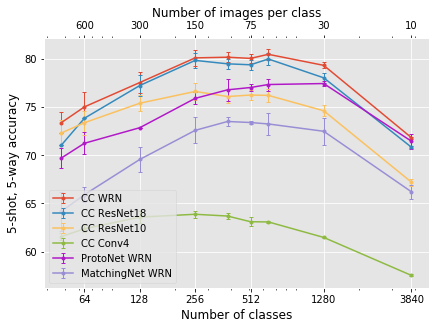

In [37]:
fig, ax = plt.subplots(figsize=(6.9, 4.6))
benchmark = 'miniIN'
N = 38400

# WRN from previous graph
result_dir = 'submitit_runs2/fig5/tradeoff_miniIN_cub/38400/' # CL 60 epochs x 1000 , others 30k, 31k 35k
take = {'benchmark':benchmark}
results, grid, args = get_result_dict(result_dir, take=take)
xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('nc', grid, results)
setup_name = setup_to_name['CC_wrn']
(_, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='-', marker='.', label=f'{setup_name}', capsize=2, 
                            elinewidth=1, color=colors[0])

result_dir = 'submitit_runs2/fig5/setups_c_d/' # CL 60 epochs x 1000 , others 30k, 31k 35k
# results, grid, args = get_result_dict(result_dir)

for i, setup in enumerate(setups[1:]):
    take = {'setup':setup, 'benchmark':benchmark}
    results, grid, args = get_result_dict(result_dir, take=take)
    if not len(results):
        continue
    print(len(results))
    xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('nc', grid, results)

    (_, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle='-', marker='.', label=f'{setup_to_name[setup]}', capsize=2, 
                                elinewidth=1, color=colors[i+1])
    
ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = [64,128,256,512,1280,3840]

ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Number of classes')
ax.set_ylabel('5-shot, 5-way accuracy')

ax2 = ax.twiny()
ax2.xaxis.set_major_formatter(NullFormatter())
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.set_xscale('log')

ax2.set_xlabel(f'Number of images per class')
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels([int(N/x) for x in xaxis_labels])
ax2.grid(False)

ax.legend(loc=3)

In [36]:
fig.savefig(f'submitit_runs2/fig5/fig5_tradeoff_setups_{benchmark}.pdf', format='pdf', bbox_inches="tight")

# Fig 6 experiments

In [ ]:
base_opt = get_opts()
base_opt.steps = [30000,31000,35000]

# Class splitting on CUB using nb of classes 3840 and 6000 using moco, oracle
grid = {
    'benchmark':['cub',],# 'miniIN'
    'class_ratio':[8, ],#, #1/8, 1/4, 1/2, 1, 2, 4
    'seed':range(1005,1008),
    'N':[38400,], # use more images ? 100k ?
    'nc':[384, 1536, 5704],# 48, 96, 192, 384, 768, 1536, 3072 # 96, 384, 1536
    'feat':['oracle', 'moco', 'randfeat'],#,
    'setup':['CC_wrn'],
}

jobs = launch_grid(exp_group_split, base_opt, grid, folder=f'submitit_runs2/fig6/fig6a_cub/', 
                   partition='uninterrupted')

In [7]:
grid

{'seed': [1005, 1006, 1007],
 'feat': ['oracle', 'randfeat', 'moco'],
 'steps': [[30000, 31000, 35000], None],
 'class_ratio': [0.125, 2, 1, 0.5, 0.25, 4, 8],
 'nc': [1536, 384, 5704]}

[{1: (40.79627, 0.1674650291442871), 5: (58.2756, 0.1719042709350586)}]


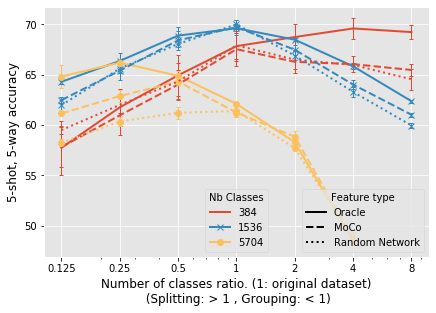

In [12]:
result_dir = 'submitit_runs2/fig6/fig6a_cub/'
results, grid, args = get_result_dict(result_dir)
fig, ax = plt.subplots(figsize=(6.9, 4.6))
benchmark = 'cub'
markers = ['','x','o',"v",'.','d']
linestyles = ['solid','dashed','dotted',]
nc_lines = []
feat_name = {'oracle':'Oracle', 'moco':'MoCo', 'randfeat':'Random Network', 'wordnet':'WordNet'}

feats = ['oracle','moco','randfeat']#grid['feat']
ncs = [384, 1536, 5704]
for i, feat in enumerate(feats):
    for j, nc in enumerate(ncs):
        take = {'nc': nc, 'feat':feat, 'benchmark':benchmark}
        r, g, a = get_result_dict(result_dir, take=take)
        if len(r) == 0:
            continue
        xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('class_ratio', g, r)
        (lines, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle=linestyles[i], marker=markers[j], markersize=6, capsize=2, 
                                    elinewidth=1, color=colors[j%len(colors)], linewidth=2)#
        nc_lines.append(lines)

ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = grid['class_ratio']
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Number of classes ratio. (1: original dataset)\n (Splitting: > 1 , Grouping: < 1)')

ax.set_ylabel(f'5-shot, 5-way accuracy')

legend1 = Legend(ax,nc_lines[::len(ncs)], [feat_name[x] for x in feats], loc=4, title='Feature type')
ax.add_artist(legend1)
for h in legend1.legendHandles:
    h.set_color('black')
    
legend2 = Legend(ax, nc_lines[:3], [str(x) for x in ncs], loc=8, title='Nb Classes')
ax.add_artist(legend2)


In [13]:
fig.savefig(f'submitit_runs2/fig6/fig6_cub.pdf', format='pdf', bbox_inches="tight")

# Fig 6cd

In [ ]:
base_opt = get_opts()
base_opt.steps = [30000, 31000, 35000]

grid = {
    'seed':range(1005,1008),
    'benchmark':['miniIN'],
    'class_ratio':[1/8, 1/4, 1/2, 1, 2, 4, 8],
    'N':[38400,], # use more images ? 100k ?
    'nc':[96, 384, 1536],
    'setup':['CC_wrn'],#['protonet_wrn', 'matchingnet_wrn'],, 'CC_ResNet18', 'CC_ResNet10', 'CC_conv4'
    'feat':['oracle', 'moco', 'randfeat'],
}

jobs = launch_grid(exp_group_split, base_opt, grid, folder=f'submitit_runs2/fig6/fig6_ab_group_split_miniIN_cub/', 
                   partition='uninterrupted')


In [21]:
# for job in jobs:
#     if job['job'].state != 'COMPLETED':
#         print(job['job'].job_id)

CC_wrn 96
CC_wrn 384
CC_wrn 1536
protonet_wrn 96


/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/private/home/sbaio/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


protonet_wrn 384
protonet_wrn 1536
matchingnet_wrn 96
matchingnet_wrn 384
matchingnet_wrn 1536


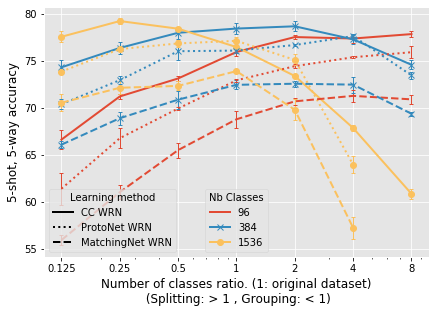

In [40]:
fig, ax = plt.subplots(figsize=(6.9, 4.6))

markers = ['','x','o',"v",'.','d']
linestyles = ['solid','dotted','dashed','dashdot']
nc_lines = []
ss = ['CC_wrn', 'protonet_wrn', 'matchingnet_wrn']
# ss = ['CC_wrn', 'CC_ResNet18', 'CC_ResNet10', 'CC_conv4']
ncs = [96, 384, 1536]


for i, setup in enumerate(ss):
    if setup == 'CC_wrn':
        result_dir = 'submitit_runs2/fig6/fig6_ab_group_split_miniIN_cub/'
    else:
        result_dir = 'submitit_runs2/fig6/fig6_cd_group_split_miniIN_setups/'
    for j, nc in enumerate(ncs):
        take = {'nc': nc, 'setup':setup, 'feat':'oracle'}
        print(setup, nc)
        r, g, a = get_result_dict(result_dir, take=take)
        if len(r) == 0:
            continue
        xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('class_ratio', g, r)
        (lines, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle=linestyles[i], marker=markers[j], markersize=6, capsize=2, 
                                    elinewidth=1, color=colors[j%len(colors)], linewidth=2)#, label=f'{setup_to_name[setup]} {nc}'
        nc_lines.append(lines)

ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = [1/8, 1/4, 1/2, 1, 2, 4, 8]
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Number of classes ratio. (1: original dataset)\n (Splitting: > 1 , Grouping: < 1)')

ax.set_ylabel(f'5-shot, 5-way accuracy')

legend1 = Legend(ax,nc_lines[::len(ncs)], [setup_to_name[x] for x in ss], loc=3, title='Learning method')
ax.add_artist(legend1)
for h in legend1.legendHandles:
    h.set_color('black')
    
legend2 = Legend(ax, nc_lines[:len(ncs)], [str(x) for x in ncs], loc=8, title='Nb Classes')
ax.add_artist(legend2)


In [41]:
fig.savefig(f'submitit_runs2/fig6/fig6_d_meta.pdf', format='pdf', bbox_inches="tight")
# fig.savefig(f'submitit_runs2/fig6/fig6_c_backbones.pdf', format='pdf', bbox_inches="tight")

oracle 96
oracle 384
oracle 1536
moco 96
moco 384
moco 1536
randfeat 96
randfeat 384
randfeat 1536


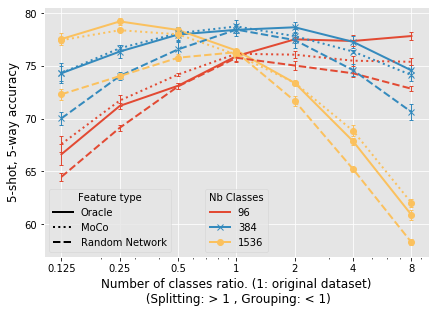

In [36]:
fig, ax = plt.subplots(figsize=(6.9, 4.6))

benchmark = 'miniIN'
markers = ['','x','o',"v",'.','d']
linestyles = ['solid','dotted','dashed','dashdot']
nc_lines = []
feats = ['oracle', 'moco', 'randfeat']
feat_to_name = {'oracle':'Oracle', 'moco':'MoCo', 'randfeat': 'Random Network'}
ncs = [96, 384, 1536]

result_dir = 'submitit_runs2/fig6/fig6_ab_group_split_miniIN_cub/'
for i, feat in enumerate(feats):
    for j, nc in enumerate(ncs):
        take = {'nc': nc, 'feat':feat, 'benchmark':benchmark}
        print(feat, nc)
        r, g, a = get_result_dict(result_dir, take=take)
        if len(r) == 0:
            continue
        xaxis, top1ms, top1stds, top5ms, top5stds = get_kshot_mean_std('class_ratio', g, r)
        (lines, caps5, _) = ax.errorbar(xaxis, top5ms, top5stds, linestyle=linestyles[i], marker=markers[j], markersize=6, capsize=2, 
                                    elinewidth=1, color=colors[j%len(colors)], linewidth=2)
        nc_lines.append(lines)

ax.set_xscale('log')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
xaxis_labels = [1/8, 1/4, 1/2, 1, 2, 4, 8]
ax.set_xticks(xaxis_labels)
ax.set_xticklabels(xaxis_labels)
ax.set_xlabel(f'Number of classes ratio. (1: original dataset)\n (Splitting: > 1 , Grouping: < 1)')

ax.set_ylabel(f'5-shot, 5-way accuracy')

legend1 = Legend(ax,nc_lines[::len(ncs)], [feat_to_name[x] for x in feats], loc=3, title='Feature type')
ax.add_artist(legend1)
for h in legend1.legendHandles:
    h.set_color('black')
    
legend2 = Legend(ax, nc_lines[:len(ncs)], [str(x) for x in ncs], loc=8, title='Nb Classes')
ax.add_artist(legend2)



In [25]:
fig.savefig(f'submitit_runs2/fig6/fig6_ab_{benchmark}.pdf', format='pdf', bbox_inches="tight")

In [52]:
c = 0; r = 0; p = 0
for job in jobs:
    if job['job'].state == 'FAILED': 
        print(job)
    elif job['job'].state == 'COMPLETED':
        c+=1
    elif job['job'].state == 'RUNNING':
        r += 1
    elif job['job'].state == 'PENDING':
        p += 1

print('Completed ', c, 'Running ', r, 'Pending', p)

Completed  0 Running  14 Pending 0


## Train miniIN6k splitted

In [ ]:
grid = {
    'nsplits':[1],#2,4,8
    'seed':range(3),
}
opt = get_opts()
opt.ngpus = 8
jobs = launch_grid(exp_split_miniIN6k_cub, opt, grid, 
                   folder='submitit_runs/0_eccv/split_miniIN6k_cub/', partition='priority')

# Fig 4: Sampling classes based on distance to test classes

In [ ]:
rankmodes = ['farthest']#['random']#'closest', 
feats = ['oracle']#['oracle','moco','wordnet']
if rankmodes == ['random']:
    feats = ['oracle']

for nc in [2500]:#, 1000, 500, 100, 50, 10[6000]:#, 100, 50, 10 [2500, 1000, 500, 100, 50, 10]:#[10, 50, 100, 500, 1000, 2500, 6000]:#
    base_opt = get_opts()
    N = nc*900
    if N > 1e6:
        bSz = 256; ngpus = 8
        base_opt.n_workers = 20
        base_opt.steps = None
    elif N > 1e5:
        bSz = 256; ngpus = 2
        base_opt.n_workers = 16
        base_opt.steps = None
    elif N > 1e4:
        bSz = 64; ngpus = 1
        base_opt.steps = None
    else:
        bSz = 64; ngpus = 1
        base_opt.steps = [15000, 17500, 20000]
    base_opt.bSz = bSz; base_opt.ngpus = ngpus
    
    print(N, bSz, ngpus, base_opt.steps)
#     grid = {
#         'setup':['CC_wrn', ],
#         'benchmark':['cub'],#, 'cub'
#         'rankmode':rankmodes,#[],# ,, 'random'
#         'nc':[nc],
#         'nim':[900],
#         'seed':range(1),
#         'feat':feats,#'moco','wordnet'],'oracle',
#     }
#     jobs = launch_grid(exp_closest_farthest_test, base_opt, grid, 
#                    folder='submitit_runs/2_eccv/closest_farthest_random_cub_feat2/', partition='priority')
    grid = {
        'setup':['CC_wrn','CC_ResNet10', 'CC_ResNet18'],
        'benchmark':['miniIN'],#, 'cub'
        'rankmode':['random','closest'],# 'closest', ['random'],#,
        'nc':[nc],
        'nim':[900],
        'seed':range(3),
        'feat':['oracle'],
    }
    jobs = launch_grid(exp_closest_farthest_test, base_opt, grid, 
                   folder='submitit_runs/2_eccv/closest_farthest_random_miniIN_archs_2500/', partition='priority')


# Fig 4: meta learning algos

In [ ]:
nim = 900

for nc in [6000,]:#10, 50, 100, 500, 1000, 2500,  2500, 1000
    base_opt = get_opts()
    N = nc*nim

    if N < 1e4:
        base_opt.stop_epoch = 200 # like CUB
    elif N < 1e5:
        base_opt.stop_epoch = 400
    elif N < 1e6:
        base_opt.stop_epoch = 3000#1000
    else:
        base_opt.stop_epoch = 3500#1500 # 1500 takes 13~14h, maybe try 

    print(N, base_opt.stop_epoch)
    grid = {
        'setup':['protonet_wrn','matchingnet_wrn'],
        'benchmark':['miniIN'],#, 'cub'
        'rankmode':['random'],#, 'closest'
        'nc':[nc],
        'nim':[nim],
        'seed':range(3),
    }
    
    jobs = launch_grid(exp_closest_farthest_test, base_opt, grid, 
                   folder='submitit_runs/2_eccv/closest_farthest_random_cub_CL_longer/', partition='uninterrupted')

In [ ]:
# CL
# 9k    -> 400x100  # 1x64
# 45k   -> 400x100  # 1x64
# 90k   -> 300x1000 # 2x256
# 450k  -> 300x1000 # 4x256
# 900k  -> 300x1000 # 2x256
# 2.25M -> 300x1000 # 8x256
# 5.4M --> 300x1000 # 8x256
# CC
# previously - 250k iterations
# now - 90 epochs
# 
# 

In [ ]:
# miniIN6k : [104490, 208980, 313470] - 256x8
# cub      : [60, 120, 180]           - 256x8
# cub      : [2730, 5460, 8190]       - 64x1
# miniIN   : [18000, 36000, 54000]    - 64x1

## Fig ?: Change benchmarks: challenging (closest classes for an episode) from miniIN1k

In [ ]:
grid = {
    'seed':range(5),
    'test_json':['miniIN1k_nim100_seed0_closest', 'miniIN1k_nim100_seed0', 'miniIN1k_nim100_seed0_farthest', ],#
    'setup':['CC_wrn'],
    'benchmark':['cub'],
    'nc':[64, 384],
    'rank':list(range(10))[::-1],
}

# opt = get_opts()
# opt.steps = [10]
# opt.test_json = 'miniIN1k_nim100_seed0'
# opt.setup = 'CC_wrn'
# opt.benchmark = 'cub'
# opt.nc = 384
# opt.seed = 5
# opt.rank = 0
# class_selection_exp(opt)

base_opt = get_opts()
base_opt.steps = [30000, 31000, 35000]
base_opt.delete_ckpt = False
jobs = launch_grid(class_selection_exp, base_opt, grid, folder=f'submitit_runs/2_eccv/feat_var_miniIN1k_closest_farthest_random2/', 
                   partition='priority')


# Fig 10: Splitting using different splitting methods

In [ ]:
opt = get_opts()
# opt.N = 3840
# opt.nc = 384
# opt.class_ratio = 1/2
# opt.seed = 7
# opt.benchmark = 'miniIN'
# opt.setup = 'CC_wrn'
# opt.feat = 'oracle'
# opt.cluster_type = 'kmeans'
# opt.group_type = 'kmeans'
# exp_group_split(opt)

grid = {
    'benchmark':['miniIN'],
    'class_ratio':[1, 2, 4, 8],
    'seed':range(1005,1008),
    'N':[38400],
    'nc':[96, 384, 1536],
    'setup':['CC_wrn'],
    'cluster_type':['kmeans','h_median_dich'],
}
jobs = launch_grid(exp_group_split, opt, grid, folder=f'submitit_runs/2_eccv/split_group_kmeans_agglo_hpbc/', 
                   partition='priority')

grid = {
    'benchmark':['miniIN'],
    'class_ratio':[1/8, 1/4, 1/2, 1],
    'seed':range(1005,1008),
    'N':[38400], 
    'nc':[96, 384, 1536],
    'setup':['CC_wrn'],
    'group_type':['kmeans','agglo'],
}
jobs = launch_grid(exp_group_split, opt, grid, folder=f'submitit_runs/2_eccv/split_group_kmeans_agglo_hpbc/', 
                   partition='priority')